# 1. házi feladat

Az első házi feladat során egy egyszerű Multi-layer Perceptron (MLP) típusú neuronhálót kell betanítani és kiértékelni egy regressziós és egy klasszifikációs feladaton a PyTorch könyvtár segítségével.

A házi feladat több részfeladatból áll (A - I), melyek egymásra épülnek. A feladat automatikus tesztelőszkripttel rendelkezik és vizsgálja az egyes részfeladatokra adott megoldások helyességét. Éppen ezért, **ne változtasd meg a notebook struktúráját**, ne szedd több részre, illetve ne módosítsd a megírt részeket, csak a megoldásaidat írd be a megfelelő helyre, különben nem fogjuk tudni értékelni! A megoldások az `# Implement your solution BELOW` és `# Implement your solution ABOVE` sorok közé írandók. Ha a megoldott részfeladatok futtatásakor a "Tester: .... OK" felirat megjelenik, _vélhetően_ jó a megoldás. Azonban, a tesztelőszkript nem képes a megoldás helyességét minden aspektus szerint ellenőrizni. Így elképzelhető, hogy beadás után további javításokat kérünk a megoldásban. A beadott házi feladatok gépi tanulás alapú plágiumellenőrzésen esnek át. Másolás gyanújának felmerülése esetén mind a másolat(ok), mind az azt/azokat ihlető eredeti megoldások visszautasíthatók.

**!!! A feladatok megoldását, vagy az arra mutató linkeket bárhol közzétenni tilos !!!**

Elakadás esetén javasolt átnézni a Canvason megosztott segédanyag notebookokat és az előadások anyagát. A Canvas fórumon "HF1 GYIK" névvel, a gyakori kérdéseket és válaszokat gyűjtjük össze. Továbbá, kérhető segítség az oktatóktól is, például a Teams rendszeren keresztül. Ehhez, kérjük a kurzus Canvas oldalán a legfelső modulban található _"
Teams beszélgetés indítása az oktatókkal"_ linket használni: ez egy Teams beszélgetést kezdeményez az összes oktatóval egyidejűleg.

**Megoldás és beküldés menete:**

A közzétett, feladatokat tartalmazó Jupyter notebook a Google Drive-on keresztül lett megosztva, így a Google saját Jupyter notebook szerkesztője és futtatókörnyezete nyílik meg a linkre kattintáskor, a Google Colab. Ennek segítségével online szerkeszthető és futtatható a megosztott notebook. Mivel a notebook csak "view" jogosultságokkal van megosztva, a Google Colab az úgynevezett "Playground" módban nyitja azt meg, ahol bár szerkeszthető és futtatható a notebook, de a változtatások nem lesznek automatikusan mentve. A notebook maradandó hatásokkal járó szerkesztése az alábbi módokon lehetséges:
- Ha online szeretnénk a notebookot szerkeszteni és futtatni a Google Colab segítségével, akkor le kell másolni azt a saját Drive tárhelyre (Google Colab file menü -> Save a copy to Drive), majd a másolatot kell megnyitni szerkesztésre.
- A notebook le is tölthető és saját számítógépen is szerkeszthető / futtatható. Ehhez Python környezet megléte szükséges, valamint a notebookban importált Python csomagok és a `jupyterlab`, vagy `notebook` (https://jupyter.org/install) csomag telepítése szükséges a Python disztribúciónk csomagkezelőjével (`pip`, `conda`, stb.).

A kész megoldást tartalmazó notebookot (.ipynb) fájlként kell feltölteni a Canvas-ban, a házi feladat beadási felületén.
**Kérjük a notebook szerkezetét nem módosítani és nem szétszedni külön feladatok szerint!**

**Határidő:** 2023. március 30., szombat, 23:59.

**Késve legkésőbb leadható:** 2023. április 5., péntek, 23:59. - **Ezt követően pótlásra és/vagy javításra nincs lehetőség, ezáltal jegyszerzésre sem. !!!**

**Értékelés:** A házi feladat helyes megoldása és oktatók által történő elfogadása feltétele a jegyszerzésnek. A házi feladat minősége részletesen pontozásra nem kerül, az értékelése kétfokozatú: megfelelt / nem felelt meg. Az első határidőig leadott nagyrészt helyes és nagyrészt teljes ("megfelelt") megoldásért 10 pont jár. Késés esetén ez elveszik.

**Kikötés:** Ahol csak lehet, hatékony, vektorizált megoldásokat várunk. További részletekért lásd: Canvas, HF1 GYIK fórum, "Használhatók-e Python ciklusok?" bejegyzés.

Tesztelő szkript letöltése, importok.

In [1]:
# Download tester
!rm annbsc24_p1_hw1_tester.py
!wget https://nipg12.inf.elte.hu/~vavsaai@nipg.lab/annbsc24_p1/files/annbsc24_p1_hw1_tester.py

import copy
import numpy as np
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader

import matplotlib.pyplot as plt

from annbsc24_p1_hw1_tester import Tester

'rm' is not recognized as an internal or external command,
operable program or batch file.
'wget' is not recognized as an internal or external command,
operable program or batch file.


###**A**: Az adatbázis betöltése

**Információ az adatbázisról**:
Az adatbázis az UCI Machine Learning Repository-ról származik (http://archive.ics.uci.edu/ml/datasets/Student+Performance). Két portugál középiskolában tanuló diákok néhány adatát és a harmadév végi, év végi jegyeiket (0-20) tartalmazza. A házi feladat keretében, **neuronhálókkal próbálunk a diákok szociális és pénzügyi háttere alapján becsléseket adni az iskolai teljesítményükre.**

A tesztelőszkript letölti a szöveges formában tárolt adatbázist és elhelyezi a `content` sztringben. Alább, kiírjuk a hosszát és az első 500 karaktert is a sztringből. Az adatbázis fájlok egy-egy sora adja meg az egy-egy mintaelemhez tartozó változók értékeit. A sorokban az egyes változókhoz tartozó értékek pontosvesszővel vannak elválasztva. Az adatbázis első sora a változók neveit tartalmazza.

A feladatod, hogy **alakítsd át a `content` sztringet az adatbázis változóinak értékeit tartalmazó NumPy tömbbé.** A tömbök adattípusa np.float32 (lebegőpontos) legyen! A változók értékeit helyezd el a `dataset_noisy` (n_mintaelem, n_változó) alakú tömbben!  Az input változókat és címkéket később választjuk majd szét.

Az adatbázis helyenként hiányzó értékeket tartalmaz: az adatok egy része nem volt elérhető az adatbázis rögzítésekor. Konkrétabban, a család méretét, a szülők együttélését és munkáját leíró oszlopokban találhatók hiányzó értékek. Ezek az ötödik (famsize), hatodik (Pstatus), kilencedik (Mjob) és tizedik (Fjob) oszlopokban találhatók. Hiányzó értékek esetén a `content` sztringben ténylegesen is hiányoznak a megfelelő pontosvesszők közt elhelyezkedő értékek, tehát ilyenkor két (vagy több) pontosvessző következik egymás után.

A hiányzó értékeket kezelned kell és fel kell ismerned beolvasás közben: a hiányzó értékek helyére a `dataset_noisy` tömbben `np.nan` (Not-a-Number) értékek kell, hogy kerüljenek. A NaN értékek kezeléséről rövid útmutató található a Canvas-on, a HF1 GYIK fórum válaszai közt.

In [4]:
tester = Tester()
content = tester.get_dataset_content()

print("Number of characters in dataset:", len(content))
print(content[:500])


Number of characters in dataset: 27388
school;sex;age;address;famsize;Pstatus;Medu;Fedu;Mjob;Fjob;reason;guardian;traveltime;studytime;failures;schoolsup;famsup;paid;activities;nursery;higher;internet;romantic;famrel;freetime;goout;Dalc;Walc;health;absences;G1;G2;G3
0;0;18;0;1;1;4;4;5;0;4;0;2;2;0;0;1;1;1;0;0;1;1;4;3;4;1;1;3;6;5;6;6
0;0;17;0;1;0;1;1;5;3;4;1;1;2;0;1;0;1;1;1;0;0;1;5;3;3;1;1;3;4;5;5;6
0;0;15;0;0;0;1;1;5;3;3;0;1;2;3;0;1;0;1;0;0;0;1;4;3;2;2;3;3;10;7;8;10
0;0;15;0;1;0;4;2;;4;0;0;1;3;0;1;0;0;0;0;0;0;0;3;2;2;1;1;5;2;15;14;15



In [5]:
# implement your solution BELOW
index = content.find("\n")
titles = content[:index].split(";")

as_list = []
for line in content[index + 1:].splitlines():
  templist = []
  for j,item in enumerate(line.split(';')):
    if item == '':
      templist.append(np.NaN)
    else:
      templist.append(np.float32(item))
  as_list.append(templist)

dataset_noisy = np.array(as_list,dtype=np.float32)

# implement your solution ABOVE

tester.test('dataset_load', dataset_noisy)

Tester: Dataset loading OK


## **B**: A hiányzó adat kezelése

NaN értékekkel nem fogunk tudni tovább dolgozni, hiszen a legtöbb NumPy/PyTorch művelet nem támogatja őket és bármilyen tömbre, melyben legalább egy NaN érték található, ezen műveletek kimenete is NaN lesz, így például a neuronhálónk becslése és költsége is. Utóbbi megakadályozza, hogy a hálót gradiens módszerrel optimalizáljuk. Éppen ezért, a hiányzó adatokat reprezentáló NaN értékeket az alábbi módon fogjuk eltüntetni:

**Hozz létre minden NaN értéket tartalmazó változóhoz egy-egy újabb változót, melyek azt jelzik, hogy valódi érték található-e az adott változóban az adott mintaelemnél, vagy nem!** Valódi érték esetén az új változó kapjon 1 értéket, NaN esetén pedig 0 értéket! Helyezd el az eredeti adatot és az új változókat a `dataset` tömbben: az új változók oszlopai kerüljenek megfelelő sorrendben az összes eredeti változót tartalmazó oszlop **után**! Az előző feladat leírásában említésre került, hogy melyik oszlopok tartalmazhatnak NaN értékeket.</br>
Mivel a 33 változós adatbázisunk #4, #5, #8 és #9 indexű oszlopai (változói) tartalmazhatnak NaN értékeket, akkor az új `dataset` tömbünk 37 változós lesz és a négy új változó az utolsó négy oszlopba kerül. Például tehát, a #33 indexű oszlopban egy adott sorba nullás érték kerül, ha a #4-es oszlopban annál a sornál NaN található, egyébként pedig 1-es érték kerül oda. Hasonlóan készítjük el a #34, #35, #36 indexű oszlopokat az #5, #8 és #9 indexű oszlopok alapján.

Végül, **helyettesítsd** az így elkészült **tömb összes NaN értékét nullával!**


In [6]:
# implement your solution BELOW

c4Mask = np.isnan(dataset_noisy[:,4])
c5Mask = np.isnan(dataset_noisy[:,5])
c8Mask = np.isnan(dataset_noisy[:,8])
c9Mask = np.isnan(dataset_noisy[:,9])

column33 = (~c4Mask * 1).reshape(dataset_noisy.shape[0],1)
column34 = (~c5Mask * 1).reshape(dataset_noisy.shape[0],1)
column35 = (~c8Mask * 1).reshape(dataset_noisy.shape[0],1)
column36 = (~c9Mask * 1).reshape(dataset_noisy.shape[0],1)

dataset = np.concatenate((dataset_noisy,column33,column34,column35,column36), axis = 1, dtype = np.float32)

dataset[c4Mask,4] = 0
dataset[c5Mask,5] = 0
dataset[c8Mask,8] = 0
dataset[c9Mask,9] = 0

# implement your solution ABOVE

tester.test('dataset_fill_missing', dataset)

Tester: Dataset loading OK


## **C**: Tanító-, validációs- és teszthalmaz szétválasztása

**Keverd meg véletlenszerűen a mintaelemeket** a `dataset` tömbben! Ezt általánosságban azért célszerű megtenni, mert az adatbázisban az elemek valamilyen tulajdonságaik alapján rendezve lehetnek. Megkeverés nélkül, a szétválasztott halmazokban jelentősen különbözne a címkék eloszlása.

Ezt követően **válaszd szét a tömböt tanító-, validációs- és teszthalmazra**, 60%, 20%, 20% arányban! A halmazokat tartalmazó három tömböt nevezd el `dataset_split_train`, `dataset_split_val`, `dataset_split_test`-nek, sorrendben!

In [7]:
# implement your solution BELOW

np.random.seed(42)
np.random.shuffle(dataset)

rowCount = dataset.shape[0]

dataset_split_train = dataset[:int(rowCount*0.6),:]

dataset_split_val = dataset[int(rowCount*0.6):int(rowCount*0.8),:]


dataset_split_test = dataset[int(rowCount*0.8):,:]

# implement your solution ABOVE

tester.test('dataset_split', dataset_split_train, dataset_split_val, dataset_split_test)

Tester: Dataset split OK


## **D**: Az adat-iterátorok létrehozása a regressziós feladathoz

A neuronhálók gradiens módszeres betanítását a legtöbbször iterátorokkal valósítjuk meg, melyek bejárják az adatbázisunkat és előállítják a neuronhálók tanításához szükséges input és címke kötegeket. A regressziós feladat során a becsülendő címkeváltozó a diákok év végi jegye lesz (`G3` nevű oszlop az eredeti adatbázis szövegfájlban - ez a 32-es indexű oszlop), míg az input változókat az összes többi attribútum adja, beleértve az újonnan előállított négy változót is.

Ebben a részfeladatban **elő kell állítanod három iterátor objektumot** `dataloader_reg_train`, `dataloader_reg_val`, `dataloader_reg_test` néven, melyek az előző részfeladatban elkészített tanító-, validációs- és teszthalmazokat tartalmazó tömböket járják be. **Az iterátorok minden lépésben két tenzort adnak vissza**, melyek egy-egy kötegnyi input és címke adatot tárolnak el. A visszaadott tenzorok alakja tehát `(batch_size, 36)` és `(batch_size, 1)` lesz. Utóbbi (a címkéket tartalmazó tenzor) a diákok év végi jegyeit fogja tartalmazni, előbbi pedig az adatbázis összes többi változójának értékét a megfelelő mintaelemekre. `batch_size` a mintaelemek számát adja meg, melyeket egyszerre, egy kötegben fog megkapni a neuronhálónk - ennek értéke lehet például 32.

Hangsúlyozandó, hogy az iterátorok a fent említett NumPy tömbökből (`np.ndarray`) nyert mintaelem-kötegeket már `torch.tensor` típusú objektumokként adják vissza (pontosabban, kételemű tuple-öket adnak vissza, melyekben `torch.tensor` objektumok lesznek). A PyTorch-al definiált neuronhálók betanításához már mindenképp PyTorch tenzorok szükségesek. A tenzorok **adattípusa** 4 bájtos lebegőpontos típus (`torch.float32`) legyen!

A **tanító és validációs halmazt felsoroló iterátorok járják be véletlen sorrendben** a hozzájuk tartozó mintaelemeket! A teszt halmazt felsoroló iterátor ne változtasson a `dataset_split_test` tömb sorrendjén!

Az iterátorok implementációja többféleképpen megoldható, de javasolt a `torch.utils.data` modul `Dataset` és `DataLoader` osztályait felhasználni, vagy szükség esetén származtatni őket.

In [8]:
# implement your solution BELOW

G3_INDEX = titles.index("G3")
BATCH_SIZE = 32

class MyDataSet(Dataset):
  def __init__(self, array):
    self.target = torch.tensor(array[:,G3_INDEX].reshape(array.shape[0],1), dtype=torch.float32)
    self.features = torch.tensor(np.delete(array,G3_INDEX,1), dtype=torch.float32)

  def __getitem__(self, idx):
    return (self.features[idx], self.target[idx])

  def __len__(self):
    return len(self.features)

dataloader_reg_train = DataLoader(MyDataSet(dataset_split_train), batch_size = BATCH_SIZE, shuffle=True)
dataloader_reg_val = DataLoader(MyDataSet(dataset_split_val), batch_size = BATCH_SIZE, shuffle=True)
dataloader_reg_test = DataLoader(MyDataSet(dataset_split_test), batch_size = BATCH_SIZE, shuffle=False)

# implement your solution ABOVE

tester.test('reg_iter', dataloader_reg_train, dataloader_reg_val, dataloader_reg_test)

Tester: Dataset iterators for regression task OK


## **E**: A regressziós neuronháló definiálása

**Definiáld a regressziós feladathoz alkalmazandó neuronhálót megvalósító osztályt**, mely az általános `torch.nn.Module` osztály leszármazottja, majd példányosítsd azt és add értékül a `reg_model` nevű változónak a példányt!

A regressziós neuronháló **tartalmazzon 3 teljesen összekötött réteget, sorban 30, 20 és 1 neuronnal és alkalmazza a ReLU aktivációs függvényt a rétegek között!**

Az új osztálynak mindenképpen meg kell valósítania a `forward(self, x)` tagfüggvényt, mely a neuronhálót (hipotézisfüggvényt) az `x` input tenzorra kiértékeli. A `forward` függvény fogja majd az előbb definiált adat-iterátorból érkező input tenzorokat megkapni és előállítani belőle a címkebecsléseket. Az osztály konstruktorában célszerű a neuronhálónk rétegeit inicializálni.

In [44]:
# implement your solution BELOW

class RegressionModel(torch.nn.Module):
  def __init__(self, input_dim):
        super().__init__()
        self.linear_relu_layers = nn.Sequential(
            nn.Linear(input_dim, 30),
            nn.ReLU(),
            nn.Linear(30, 20),
            nn.ReLU(),
            nn.Linear(20, 1)
        )


  def forward(self, x):
      return self.linear_relu_layers(x)

reg_model = RegressionModel(dataset.shape[1] - 1)
# implement your solution ABOVE

tester.test('reg_model_architecture', reg_model)

Tester: Regression model architecture OK


## **F**: A háló betanítása regressziós feladatra

**Tanítsd be a** `reg_model` **neuronhálót** a tanítóhalmazon a `dataloader_reg_train` iterátor segítségével és alkalmazd a `dataloader_reg_val` iterátort a validációhoz! Az iterátorok egyetlen (akár véletlen sorrendben történő) végighaladása a tanító és validációs adathalmazokon határoz meg egy _epoch_-ot.

Alkalmazd a regressziókor szokásosan használt **"átlagos négyzetes eltérés" költséget**! **Mérd le minden epoch-ban a tanító- és a validációs halmazon mért költségeket, majd a tanítás végeztével rajzold ki ezeknek az értékeknek a tanítás során való alakulását egy közös grafikonon!** A grafikonok kirajzolásához használhatod például a `matplotlib` könyvtárat. Figyelj rá, hogy a grafikonon jól látszódjanak a görbék közti eltérések a tanítás végén is! Ha szükséges, beállíthatod ehhez kézzel, hogy az y tengely melyik részét mutassa a grafikon. **A grafikonon legyen jelmagyarázat** (legend), mely megmutatja, melyik görbe írja le a tanítási költséget és melyik a validációs költséget!

Azt, hogy a tanítás meddig tartson (az epoch-ok számát) megadhatod kézzel is, a validációs költség alakulása alapján: próbáld úgy megadni, hogy a neuronháló lehetőleg jól betanult legyen, de súlyos túltanulás még ne jelenjen meg!

A betanításhoz válassz egy gradiens módszer alapú **optimalizációs algoritmust** a `torch.optim` modulból (pl. `SGD`, `Adam`, `RMSprop`, stb.), majd válassz egy megfelelő **tanulási rátát** is!

A betanítás végeztével **mérd le az átlagos költséget a teljes teszthalmazon** és add értékül a kapott számot a `test_mse` változónak!

Ezt követően, **válassz néhány mintaelemet a teszthalmazból** (például a `dataloader_reg_test` iterátor segítségével) és **adj becslést a címkéjükre** az input változók értékei alapján, majd **írasd ki az egyes mintaelemekre a becsült és az igazi címkéjüket!** Így példákon is láthatjuk, hogy mennyire ad jó becsléseket a neuronhálónk.



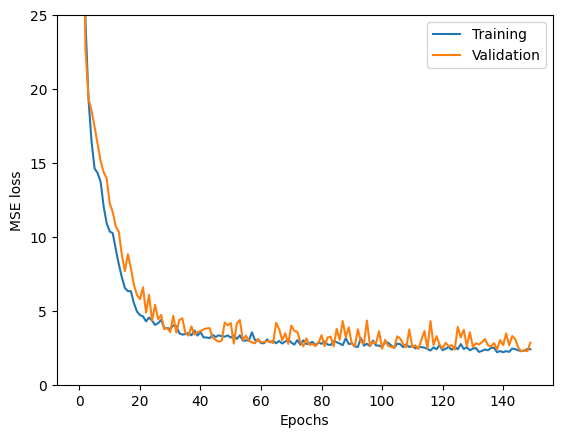

Test sample #1, pred vs true label: 9.60810661315918 vs 10.0
Test sample #2, pred vs true label: 9.905488014221191 vs 10.0
Test sample #3, pred vs true label: 10.167136192321777 vs 10.0
Test sample #4, pred vs true label: 10.482290267944336 vs 10.0
Test sample #5, pred vs true label: 14.45950698852539 vs 15.0
Test sample #6, pred vs true label: 14.71530532836914 vs 15.0
Test sample #7, pred vs true label: 17.823637008666992 vs 18.0
Test sample #8, pred vs true label: 8.450891494750977 vs 9.0
Test sample #9, pred vs true label: 11.414653778076172 vs 11.0
Test sample #10, pred vs true label: 8.715965270996094 vs 10.0
Test metrics - MSE: 3.36950945854187
Tester: Regression model learning OK


In [45]:
# implement your solution BELOW

# Kezdeti értékek:

epoch_count = 150
loss_fn = torch.nn.MSELoss();
learning_rate = 0.0005

optimizer = torch.optim.RMSprop(reg_model.parameters(), lr=learning_rate)

# Tanítás:

global_train_losses = []
global_val_losses = []

for epoch in range(epoch_count):
  reg_model.train()

  train_losses = []

  for x,y in dataloader_reg_train:
    optimizer.zero_grad()
    guess = reg_model(x)
    loss = loss_fn(guess, y)

    train_losses.append(loss)

    loss.backward()
    optimizer.step()

  train_losses = torch.tensor(train_losses)
  global_train_losses.append(train_losses.mean())

  reg_model.eval()

  val_losses = []

  for x,y in dataloader_reg_val:
    with torch.no_grad():
      guess = reg_model(x)
    loss = loss_fn(guess, y)

    val_losses.append(loss)

  val_losses = torch.tensor(val_losses)
  global_val_losses.append(val_losses.mean())

# Gráf + statisztikák:

plt.plot(global_train_losses, label='Training')
plt.plot(global_val_losses, label='Validation')
plt.xlabel('Epochs')
plt.ylabel('MSE loss')
plt.legend()
plt.ylim(0,25)
plt.show()

test_losses = []
for x,y in dataloader_reg_test:
    with torch.no_grad():
      guess = reg_model(x)
    loss = loss_fn(guess, y)
    test_losses.append(loss)

test_losses = torch.tensor(test_losses)

test_mse = test_losses.mean()

# Pédák:

example_count = 0

#példák randomizációval:
batch_indices = list(range(len(dataloader_reg_test.dataset)))
np.random.shuffle(batch_indices)

for batch_idx in batch_indices:
  x,y = dataloader_reg_test.dataset[batch_idx]
  with torch.no_grad():
    guess = reg_model(x)
  for i in range(len(guess)):
    if example_count >= 10:
      break
    example_count += 1
    print("Test sample #", example_count, ", pred vs true label: ", float(guess[i].item()), " vs ", float(y.item()), sep="")
  if example_count >= 10:
    break

print("Test metrics - MSE:", float(test_mse))

# implement your solution ABOVE

tester.test('reg_model_learning', test_mse)

## **G**: Az adat-iterátorok létrehozása a klasszifikációs feladathoz

Hasonlóan a D) feladathoz, itt is három adat-iterátort kell létrehoznunk, azonban ezúttal egy kissé eltérő feladatot fogunk megtanulni megoldani, így a visszaadott tenzorok alakja / adattípusa is eltérő lesz. **Állítsd elő** a `dataloader_cl_train`, `dataloader_cl_val`, `dataloader_cl_test` nevű **iterátorokat**, melyek ugyancsak a C) részfeladatban elkészült tanító-, validációs- és teszthalmazokat tartalmazó tömböket járják be! A klasszifikációs feladatban input változókként az összes változót felhasználjuk az adatbázisban, kivéve a három harmadév végi jegyét a diákoknak (`G1`, `G2`, `G3` nevű, #30, #31 és #32 indexű oszlopok az eredeti adatbázis szövegfájlban). Címkeként három kategóriát definiálunk és az összes diákot besoroljuk ezekbe a kategóriákba:
- **"Gyengén teljesítő diákok"** kategória, #0 kategóriaindex: azon diákok kerülnek ide, akik átlagos jegye kisebb, mint 9.5.
- **"Közepesen teljesítő diákok"** kategória, #1 kategóriaindex: azon diákok kerülnek ide, akik legnagyobb jegye kisebb, mint 14, de nem tartoznak a "Gyengén teljesítő diákok" közé.
- **"Jól teljesítő diákok"** kategória, #2 kategóriaindex: azon diákok kerülnek ide, akik nem tartoznak a másik két kategóriába.

A fentiek alapján az iterátorok által visszaadott tenzorok alakja `(batch_size, 34)` és `(batch_size, 1)` lesz. Utóbbi (a címkéket tartalmazó tenzor) a diákok kategóriaindexét fogja tartalmazni (azaz 0, 1, vagy 2 értékeket, `torch.int64` adattípusban), előbbi pedig az adatbázis összes felhasznált változójának értékét a megfelelő mintaelemekre `torch.float32` adattípusban. `batch_size` ezúttal is a mintaelemek számát adja meg, ez kézzel beállítandó.

A **tanító és validációs halmazt felsoroló iterátorok véletlen sorrendben járják be** a hozzájuk tartozó mintaelemeket! A teszt halmazt felsoroló iterátor ne változtasson a `dataset_split_test` tömb sorrendjén!

In [55]:
# implement your solution BELOW

G1_INDEX = titles.index("G1")
G2_INDEX = titles.index("G2")

BATCH_SIZE = 32

class MyDataSetForG(Dataset):
  def __init__(self, array):
    target_list = []
    for item in array[:,G1_INDEX:G3_INDEX + 1]:
      avg = sum(item) / 3.0
      if avg < 9.5:
        target_list.append(0)
      elif avg < 14:
        target_list.append(1)
      else:
        target_list.append(2)

    self.target = torch.tensor(target_list, dtype=torch.int64)
    self.features = torch.tensor(np.delete(array,[G1_INDEX, G2_INDEX, G3_INDEX],1), dtype=torch.float32)

  def __getitem__(self, idx):
    return (self.features[idx], self.target[idx])

  def __len__(self):
    return len(self.features)

dataloader_cl_train = DataLoader(MyDataSetForG(dataset_split_train), batch_size = BATCH_SIZE, shuffle=True)
dataloader_cl_val = DataLoader(MyDataSetForG(dataset_split_val), batch_size = BATCH_SIZE, shuffle=True)
dataloader_cl_test = DataLoader(MyDataSetForG(dataset_split_test), batch_size = BATCH_SIZE, shuffle=False)

# implement your solution ABOVE

tester.test('cl_iter', dataloader_cl_train, dataloader_cl_val, dataloader_cl_test)

Tester: Dataset iterators for classification task OK


## **H**: A klasszifikációs neuronháló definiálása

**Definiáld a klasszifikációs feladathoz alkalmazandó neuronhálót megvalósító osztályt**, mely a regressziós neuronhálót implementáló osztályhoz hasonlóan, az általános `torch.nn.Module` osztály leszármazottja! Példányosítsd az új osztályt és add értékül a `cl_model` nevű változónak a példányt!

A klasszifikációs neuronháló **tartalmazzon 3 teljesen összekötött réteget! Az első kettő réteg tartalmazzon egyenként 30 és 20 neuront és alkalmazza a ReLU aktivációs függvényt a rétegek után!** Az utolsó réteget a háromkategóriás klasszifikációnak megfelelően kell kialakítani! Lásd a "HF1 GYIK" fórumot!

In [56]:
# implement your solution BELOW

class RegressionModelForH(torch.nn.Module):
  def __init__(self, input_dim):
        super().__init__()
        self.linear_relu_layers = nn.Sequential(
            nn.Linear(input_dim, 30),
            nn.ReLU(),
            nn.Linear(30, 20),
            nn.ReLU(),
            nn.Linear(20, 3)
        )

  def forward(self, x):
      return self.linear_relu_layers(x)

cl_model = RegressionModelForH(dataset.shape[1] - 3)

# implement your solution ABOVE

tester.test('cl_model_architecture', cl_model)

Tester: Classification model architecture OK


## **I**: A háló betanítása (multi-class) klasszifikációs feladatra

**Tanítsd be a** `cl_model` **neuronhálót** a tanítóhalmazon a `dataloader_cl_train` iterátor segítségével és alkalmazd a `dataloader_cl_val` iterátort a validációhoz!

Alkalmazd a multi-class klasszifikációkor szokásosan használt **cross-entropy költséget**! **Mérd le minden epoch-ban a tanító- és a validációs halmazon mért költségeket, majd a tanítás végeztével rajzold ki ezeknek az értékeknek a tanítás során való alakulását egy közös grafikonon!** A grafikonon a jelmagyarázat meglétére és a görbék könnyű elkülöníthetőségére figyelj ezúttal is!

A tanítást ezúttal az **early stopping** technika állítsa le! Amennyiben adott számú epoch-on keresztül (`patience`) nem javul a validációs költség, érjen véget a betanítás és **állítsuk vissza a `cl_model` súlyait abból az epoch-ból, amikor a legjobb volt a validációs költség!** Mindez automatikusan történjen!

A betanítás végeztével **mérd le az átlagos költséget a teljes teszthalmazon** és add értékül a kapott számot a `test_ce` változónak!

**Számold ki az _accuracy_ (pontosság) metrikát is a teszthalmaz elemein** és add értékül a kapott számot a `test_acc` változónak! Az _accuracy_ metrika a helyesen klasszifikált mintaelemek arányát adja meg. Például, ha 150 mintaelem kategóriájának becslésekor 75 esetben találtuk el a helyes kategóriát, az _accuracy_ értéke 0.5 lesz.

Ezt követően, **válassz néhány mintaelemet a teszthalmazból** (például a `dataloader_cl_test` iterátor segítségével) és **adj becslést a címkéjükre** (a kategória indexére) az input változók értékei alapján, majd **írasd ki az egyes mintaelemekre a becsült és az igazi címkéjüket** (a kategóriák indexét)! Így példákon is láthatjuk, hogy mennyire ad jó becsléseket a neuronhálónk.

Végezetül, **számold ki a háló teszthalmazon vett konfúziós mátrixát és rajzold ki azt**! A konfúziós mátrix egy k x k méretű mátrix k kategória esetén, ahol az `[i,j]` indexű elem megadja, hogy az adathalmazon a modellünk hány `i` kategóriába tartozó mintaelemet becsült a `j` kategóriába. A modellünk jó teljesítményét jelzi, ha minél több elem kerül a konfúziós mátrix főátlójába. A számoláshoz felhasználhatsz külső könyvtárat is, de NumPy-ban is megoldható. A kirajzoláshoz használható például a `matplotlib.pyplot` csomag `imshow` függvénye. Figyelj rá, hogy a grafikonon világosan látszon, hogy melyik tengely sorolja fel az igazi kategóriákat és melyik a becsült kategóriákat, látszanak a sorok és oszlopok végén a kategóriák indexei és a cellákban az odatartozó mintaelemek darabszáma!


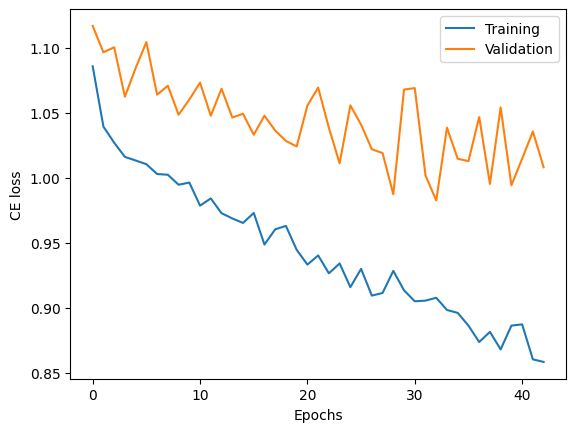

Test metrics - CE: 1.0157164335250854, ACC: 0.5063291192054749
Test sample #1, pred vs true label: 0 vs 1
Test sample #2, pred vs true label: 0 vs 1
Test sample #3, pred vs true label: 0 vs 1
Test sample #4, pred vs true label: 0 vs 0
Test sample #5, pred vs true label: 0 vs 0
Test sample #6, pred vs true label: 0 vs 0
Test sample #7, pred vs true label: 0 vs 0
Test sample #8, pred vs true label: 0 vs 0
Test sample #9, pred vs true label: 0 vs 0
Test sample #10, pred vs true label: 0 vs 1


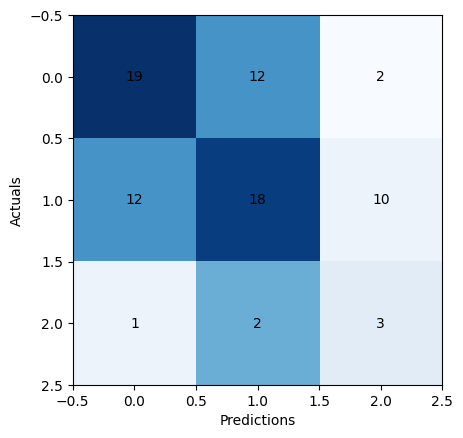

Tester: Classification model learning OK


In [57]:
# implement your solution BELOW

# Kezdeti értékek:

model_path = 'model.pth'
torch.save(cl_model.state_dict, model_path)
patience = 10
no_improvement_count = 0
#last_loss = 100_000
min_loss = np.inf

loss_fn = torch.nn.CrossEntropyLoss();
learning_rate = 0.0005

optimizer = torch.optim.RMSprop(cl_model.parameters(), lr=learning_rate)

# Tanítás:

global_train_losses = []
global_val_losses = []

while no_improvement_count < patience:
  cl_model.train()

  train_losses = []

  for x,y in dataloader_cl_train:
    optimizer.zero_grad()
    guess = cl_model(x)
    loss = loss_fn(guess, y)

    train_losses.append(loss)

    loss.backward()
    optimizer.step()

  train_losses = torch.tensor(train_losses)
  global_train_losses.append(train_losses.mean())

  cl_model.eval()

  val_losses = []

  for x,y in dataloader_cl_val:
    with torch.no_grad():
      guess = cl_model(x)
    loss = loss_fn(guess, y)

    val_losses.append(loss)

  val_losses = torch.tensor(val_losses)
  val_loss_mean = val_losses.mean()
  global_val_losses.append(val_loss_mean)

  if min_loss < val_loss_mean:
    no_improvement_count += 1
  else:
    no_improvement_count = 0
    torch.save(cl_model.state_dict, model_path)
    min_loss = val_loss_mean


cl_model.state_dict = torch.load(model_path)

# Gráf + statisztikák:

plt.plot(global_train_losses, label='Training')
plt.plot(global_val_losses, label='Validation')
plt.xlabel('Epochs')
plt.ylabel('CE loss')
plt.legend()
plt.show()

test_losses = []
test_acc_list = []
for x,y in dataloader_cl_test:
    with torch.no_grad():
      guess = cl_model(x)
    loss = loss_fn(guess, y)
    test_losses.append(loss)
    for i in range(len(guess)):
      test_acc_list.append(1 if torch.argmax(guess[i]) == y[i] else 0)

test_losses = torch.tensor(test_losses)
test_acc_list = torch.tensor(test_acc_list)

test_ce = test_losses.mean()
test_acc = test_acc_list.mean(dtype = torch.float32)

print("Test metrics - CE: ", float(test_ce), ", ACC: ", float(test_acc), sep="")

# Példák randomizációval:
batch_indices = list(range(len(dataloader_cl_test.dataset)))
np.random.shuffle(batch_indices)

example_count = 0
for batch_idx in batch_indices:
  x,y = dataloader_cl_test.dataset[batch_idx]
  with torch.no_grad():
    guess = cl_model(x)
  for i in range(len(guess)):
    if example_count >= 10:
      break
    example_count += 1
    print("Test sample #", example_count, ", pred vs true label: ", int(torch.argmax(guess[i])), " vs ", int(y.item()), sep="")
  if example_count >= 10:
    break

# Konfúziós mátrix:

matrix = np.zeros(9).reshape(3,3)

for x, y in dataloader_cl_test:
  for i in range(len(x)):
    guess = torch.argmax(cl_model(x[i]))
    matrix[y[i],guess] += 1

plt.imshow(matrix, interpolation="none", cmap=plt.cm.Blues)
for (i,j), item in np.ndenumerate(matrix):
  plt.text(i,j,int(item),ha="center",va="center")

plt.xlabel("Predictions")
plt.ylabel("Actuals")
plt.show()

# implement your solution ABOVE

tester.test('cl_model_learning', test_ce, test_acc)